# Data collection of soccer players

## Libraries

In [9]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
from scipy.stats import norm, skew, kurtosis, anderson, kstest
import fitter
from fitter import Fitter, get_common_distributions, get_distributions
import seaborn as sns

## Part 1

In [73]:
data = pd.read_csv("statistics table189.csv",usecols=['player_id', 'Season', 'Appearances', 'Competition'])
leagues = ['LaLiga','Serie A', 'Premier League', 'Ligue 1', 'Bundesliga']
rslt_df = data[data['Season'] == '21/22']
rslt_df = rslt_df[rslt_df['Competition'].isin(leagues)]
rslt_df = rslt_df[rslt_df['Appearances'] != '-']
rslt_df = rslt_df.reset_index(drop=True)

rslt_df['Appearances']= rslt_df['Appearances'].astype(int)
rslt_df.head()


,player_id,Season,Competition,Appearances
0,108390,21/22,LaLiga,36
1,404839,21/22,LaLiga,2
2,401530,21/22,LaLiga,34
3,59016,21/22,LaLiga,30
4,58884,21/22,LaLiga,28


In [74]:
# use the IQR method to remove outliers
Q1 = rslt_df['Appearances'].quantile(0.25)
Q3 = rslt_df['Appearances'].quantile(0.75)
IQR = Q3 - Q1
rslt_df = rslt_df[(rslt_df['Appearances'] >= Q1 - 1.5*IQR) & (rslt_df['Appearances'] <= Q3 + 1.5*IQR)]


['cauchy', 'chi2', 'expon', 'exponpow', 'gamma', 'lognorm', 'norm', 'powerlaw', 'rayleigh', 'uniform']


Fitting 10 distributions: 100%|██████████| 10/10 [00:00<00:00, 10.57it/s]


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
uniform,0.157086,726.183583,-23329.868421,inf,0.097302,2.106024e-20
expon,0.167468,787.668888,-23174.936961,inf,0.161610,1.031521e-55
lognorm,0.168246,1147.742271,-23155.913891,inf,0.530417,0.000000e+00
rayleigh,0.172590,760.166351,-23101.987873,inf,0.108941,1.772921e-25
norm,0.173102,763.550998,-23094.822727,inf,0.102120,1.962899e-22


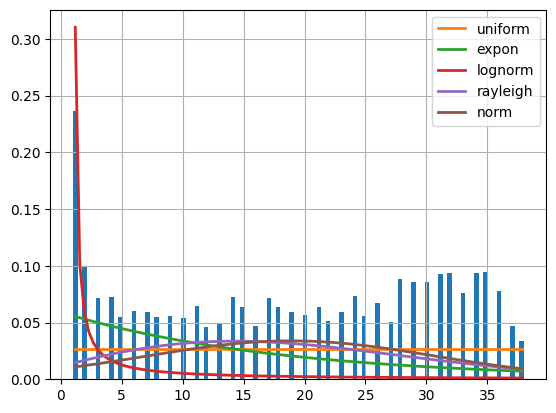

In [75]:
apc = rslt_df["Appearances"].values
dist = get_common_distributions()
print(dist)
f = Fitter(apc, distributions= dist)
f.fit()
f.summary()


Fitting 2 distributions: 100%|██████████| 2/2 [00:00<00:00,  5.10it/s]


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
lognorm,0.168246,1147.742271,-23155.913891,inf,0.530417,0.000000e+00
pearson3,0.170577,767.476691,-23122.612340,inf,0.098473,6.903208e-21


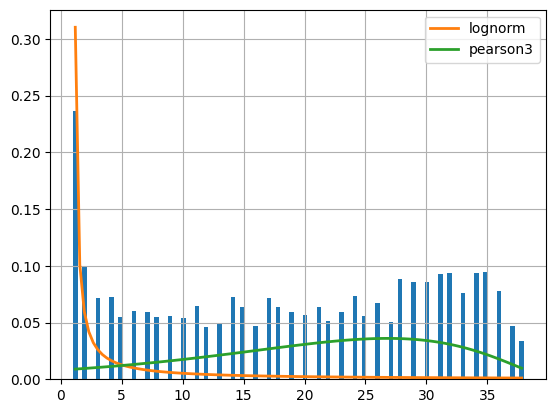

In [77]:

apc = rslt_df["Appearances"].values

f = Fitter(apc,
           distributions=['lognorm',
                          'pearson3',])

f.fit()
f.summary()


## Part 1.2

In [78]:
data = pd.read_csv("statistics table189.csv",usecols=['player_id', 'Season', 'Appearances', 'Competition', 'Squad']) 
leagues = ['LaLiga','Serie A', 'Premier League', 'Ligue 1', 'Bundesliga']
rslt_df = data[data['Season'] == '21/22']
rslt_df = rslt_df[rslt_df['Competition'].isin(leagues)]
rslt_df = rslt_df[rslt_df['Appearances'] != '-']
rslt_df = rslt_df.reset_index(drop=True)

#rslt_df.head()


apc_df = pd.DataFrame({'Appearances': rslt_df['Appearances'], 'Squad': rslt_df['Squad']})
apc_df['Appearances']= apc_df['Appearances'].astype(int)
apc_df['Squad']= apc_df['Squad'].astype(int)
apc_df['percent'] = apc_df['Appearances']/apc_df['Squad']
#apc_df['percent_count'] = apc_df.groupby('percent')['percent'].transform('count')
apc_df.drop_duplicates(subset='Appearances', keep='first', inplace=True)
#apc_df['Appearances']= apc_df['Appearances'].astype(int)
apc_df = apc_df.sort_values(['percent'])
apc_df.head()


,Appearances,Squad,percent
1,2,34,0.058824
5,5,31,0.161290
8,3,11,0.272727
123,7,25,0.280000
67,6,16,0.375000


In [79]:
# use the IQR method to remove outliers
Q1 = apc_df['percent'].quantile(0.25)
Q3 = apc_df['percent'].quantile(0.75)
IQR = Q3 - Q1
apc_df = apc_df[(apc_df['percent'] >= Q1 - 1.5*IQR) & (apc_df['percent'] <= Q3 + 1.5*IQR)]


Fitting 2 distributions: 100%|██████████| 2/2 [00:00<00:00,  7.57it/s]


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
beta,612.746945,54.492478,120.204248,inf,0.263158,0.008223
pearson3,621.144389,148.148912,117.083900,inf,0.263158,0.008223


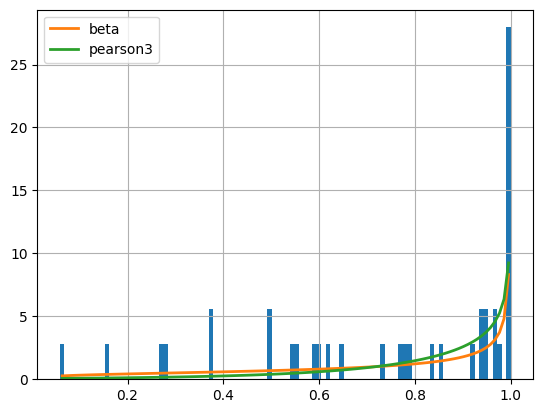

In [80]:
percent = apc_df["percent"].values
f = Fitter(percent,
           distributions=['pearson3',
                          "beta"])
f.fit()
f.summary()


## Part 2

In [114]:
goal_data = pd.read_csv("statistics table189.csv",usecols=['player_id', 'Season', 'Goals','Competition'])  # assume data is in a CSV file

goal_df = goal_data[goal_data['Season'] == '21/22']

leagues = ['LaLiga','Serie A', 'Premier League', 'Ligue 1', 'Bundesliga']
goal_df = goal_df[goal_df['Competition'].isin(leagues)]

# Convert the '-' values to NaN
goal_df['Goals'] = goal_df['Goals'].replace('-', np.nan)


# Calculate the median of the goals column
#median_goals = goal_df['Goals'].median()

# Replace the NaN values with the median
goal_df.dropna(inplace=True)

goal_df = goal_df.reset_index(drop=True)

goal_df['Goals'] = goal_df['Goals'].astype(int)

goals_by_player = goal_df.groupby('player_id')['Goals'].sum().rename('total_goals')

# Create a new dataframe from the results
goals_by_player_df = pd.DataFrame({'player_id': goals_by_player.index, 'total_goal': goals_by_player.values})

#goal_df.head(50)


In [119]:
price_data = pd.read_csv("transfer table189.csv",usecols=['player_id', 'Season', 'MV'])  # assume data is in a CSV file

price_df = price_data[price_data['Season'] == '21/22']

# function to process 
def process_value(value):
    # Remove the "" from the beginning of the value
    value = value[1:]
    # Check if the last letter is "m" or "k" and scale the number accordingly
    if value == '-':
        value = np.nan
    elif 'm' in value:
        value = float(value[:-1]) * 1000000
    elif 'k' in value:
        value = float(value[:-1]) * 1000
    
    return value


# Apply the function to the desired column of the dataframe
price_df['MV'] = price_df['MV'].apply(process_value)

# Convert the 'MV' column to numeric values, ignoring errors
price_df['MV'] = pd.to_numeric(price_df['MV'], errors='coerce')
#Calculate the median of the goals column
median_mv = price_df['MV'].median()

# Replace the NaN values with the median
price_df['MV'].fillna(median_mv, inplace=True)


mv_by_player = price_df.groupby('player_id')['MV'].sum()


mv_by_player_df = pd.DataFrame({'player_id': mv_by_player.index, 'total_MV': mv_by_player.values})
#mv_by_player_df.head(40)

C:\Users\1001\AppData\Local\Temp\ipykernel_26788\4132477079.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  price_df['MV'] = price_df['MV'].apply(process_value)
C:\Users\1001\AppData\Local\Temp\ipykernel_26788\4132477079.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  price_df['MV'] = pd.to_numeric(price_df['MV'], errors='coerce')
c:\Users\1001\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a 

In [120]:
# Merge price_df and goal_df on the 'player_id' column
merged_df = pd.merge(goals_by_player_df , mv_by_player_df, on='player_id')

#merged_df

In [121]:
# Find duplicate player_id values
duplicate_ids = merged_df[mv_by_player_df['player_id'].duplicated()]

# Print the duplicate player_id values
print(duplicate_ids)

Empty DataFrame
Columns: [player_id, total_goal, total_MV]
Index: []


C:\Users\1001\AppData\Local\Temp\ipykernel_26788\3109028989.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  duplicate_ids = merged_df[mv_by_player_df['player_id'].duplicated()]


In [122]:
merged_df

,player_id,total_goal,total_MV
0,8198,18,45000000.0
1,14221,2,1100000.0
2,15951,1,3000000.0
3,25488,7,2500000.0
4,25557,2,10000000.0
...,...,...,...
400,805908,1,2200000.0
401,822458,7,700000.0
402,823231,1,2200000.0
403,872380,2,4400000.0


In [125]:
# use the IQR method to remove outliers
Q1 = merged_df['total_MV'].quantile(0.25)
Q3 = merged_df['total_MV'].quantile(0.75)
IQR = Q3 - Q1
merged_df = merged_df[(merged_df['total_MV'] >= Q1 - 1.5*IQR) & (merged_df['total_MV'] <= Q3 + 1.5*IQR)]

# use the IQR method to remove outliers
Q1 = merged_df['total_goal'].quantile(0.25)
Q3 = merged_df['total_goal'].quantile(0.75)
IQR = Q3 - Q1
merged_df = merged_df[(merged_df['total_goal'] >= Q1 - 1.5*IQR) & (merged_df['total_goal'] <= Q3 + 1.5*IQR)]

merged_df.head()

,player_id,total_goal,total_MV
1,14221,2,1100000.0
2,15951,1,3000000.0
4,25557,2,10000000.0
5,26399,1,33000000.0
9,34870,3,1200000.0


In [124]:
grouped_data = merged_df.groupby('total_goal')['total_MV'].agg(['mean', 'median', 'std'])
grouped_data

,mean,median,std
total_goal,,,
1,8.598353e+06,5300000.0,8.933595e+06
2,9.363176e+06,6750000.0,8.167936e+06
3,1.128704e+07,7000000.0,1.125028e+07
4,1.528947e+07,14000000.0,1.166942e+07
5,1.353704e+07,10000000.0,1.072327e+07
6,1.721333e+07,17000000.0,1.007953e+07
7,1.850000e+07,18000000.0,1.309075e+07
8,1.314286e+07,9000000.0,1.375595e+07


slope: 1383058.2928318686
intercept: 6901911.341525642


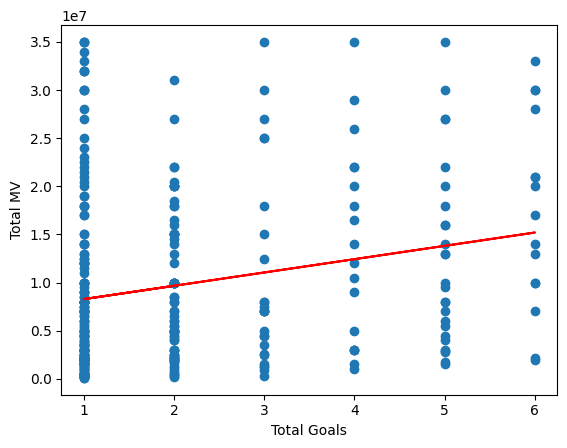

In [126]:
import scipy.stats as stats
import matplotlib.pyplot as plt

# Calculate the linear regression of total_goals vs. total_mv
slope, intercept, r_value, p_value, std_err = stats.linregress(merged_df['total_goal'], merged_df['total_MV'])

# Print the slope and intercept
print("slope:", slope)
print("intercept:", intercept)

# Plot the data and the line
plt.scatter(merged_df['total_goal'], merged_df['total_MV'])
plt.plot(merged_df['total_goal'], slope * merged_df['total_goal'] + intercept, color='red')
plt.xlabel('Total Goals')
plt.ylabel('Total MV')
plt.show()

## Part 3

In [127]:
player_data = pd.read_csv("player table189.csv",usecols=['player_id', 'main_position'])  # assume data is in a CSV file
position = ['Attack Left Winger','Attack Centre Forward', 'Attack Right Winger', 'Attack Second Striker']

position_df = player_data[player_data['main_position'].isin(position)]

position_mv_goal_df = pd.merge(merged_df , position_df, on='player_id')

position_mv_goal_df.head()

,player_id,total_goal,total_MV,main_position
0,14221,2,1100000.0,Attack Right Winger
1,26399,1,33000000.0,Attack Centre Forward
2,34870,3,1200000.0,Attack Centre Forward
3,36371,4,1000000.0,Attack Centre Forward
4,37834,1,8000000.0,Attack Centre Forward


In [128]:
position_mv_goal_df['main_position'].replace(['Attack Left Winger','Attack Centre Forward', 'Attack Right Winger', 'Attack Second Striker'], 'striker', inplace=True)
position_mv_goal_df['main_position'].replace(['Defender Centre Back', 'Defender Right Back', 'Defender Left Back'], 'defender', inplace=True)
position_mv_goal_df['main_position'].replace(['midfield Central Midfield', 'midfield Attacking Midfield', 'midfield Defensive Midfield', 'midfield', 'midfield Left Midfield', 'midfield Right Midfield'], 'midfielder', inplace=True)
# Verify the new values in the 'position' column
print(position_mv_goal_df['main_position'].unique())

['striker']


In [129]:
# use the IQR method to remove outliers
Q1 = position_mv_goal_df['total_MV'].quantile(0.25)
Q3 = position_mv_goal_df['total_MV'].quantile(0.75)
IQR = Q3 - Q1
position_mv_goal_df = position_mv_goal_df[(position_mv_goal_df['total_MV'] >= Q1 - 1.5*IQR) & (position_mv_goal_df['total_MV'] <= Q3 + 1.5*IQR)]

Q1 = position_mv_goal_df['total_goal'].quantile(0.25)
Q3 = position_mv_goal_df['total_goal'].quantile(0.75)
IQR = Q3 - Q1
position_mv_goal_df = position_mv_goal_df[(position_mv_goal_df['total_goal'] >= Q1 - 1.5*IQR) & (position_mv_goal_df['total_goal'] <= Q3 + 1.5*IQR)]


In [130]:
grouped_data = position_mv_goal_df.groupby('main_position')['total_MV'].agg(['mean', 'median', 'std'])
grouped_data

,mean,median,std
main_position,,,
striker,9.249803e+06,7000000.0,7.794252e+06


slope: 1507041.196896301
intercept: 5144005.8730226755


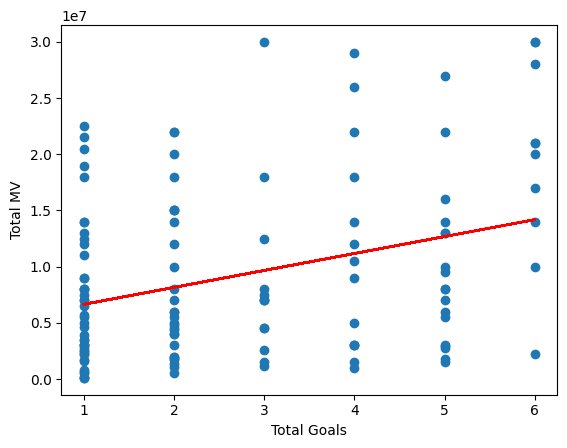

In [131]:
import scipy.stats as stats
import matplotlib.pyplot as plt


# Calculate the linear regression of total_goals vs. total_mv for strikers
slope, intercept, r_value, p_value, std_err = stats.linregress(position_mv_goal_df['total_goal'], position_mv_goal_df['total_MV'])

# Print the slope and intercept
print("slope:", slope)
print("intercept:", intercept)

# Plot the data and the line
plt.scatter(position_mv_goal_df['total_goal'], position_mv_goal_df['total_MV'])
plt.plot(position_mv_goal_df['total_goal'], slope * position_mv_goal_df['total_goal'] + intercept, color='red')
plt.xlabel('Total Goals')
plt.ylabel('Total MV')
plt.show()

## Part 4

In [132]:
position_mv_df = pd.merge(player_data , mv_by_player_df, on='player_id')

#position_mv_df.head(40)

In [133]:
position_mv_df['main_position'].replace(['Attack Left Winger','Attack Centre Forward', 'Attack Right Winger', 'Attack Second Striker'], 'striker', inplace=True)
position_mv_df['main_position'].replace(['Defender Centre Back', 'Defender Right Back', 'Defender Left Back'], 'defender', inplace=True)
position_mv_df['main_position'].replace(['midfield Central Midfield', 'midfield Attacking Midfield', 'midfield Defensive Midfield', 'midfield', 'midfield Left Midfield', 'midfield Right Midfield'], 'midfielder', inplace=True)
# Verify the new values in the 'position' column
print(position_mv_df['main_position'].unique())

['Goalkeeper' 'defender' 'midfielder' 'striker']


In [32]:
position_mv_df.head()

,player_id,main_position,total_MV
0,926850,Goalkeeper,2200000.0
1,59016,defender,55000000.0
2,662261,defender,2200000.0
3,280730,defender,22000000.0
4,640428,midfielder,55000000.0


In [33]:
Q1 = position_mv_df['total_MV'].quantile(0.25)
Q3 = position_mv_df['total_MV'].quantile(0.75)
IQR = Q3 - Q1
position_mv_df = position_mv_df[(position_mv_df['total_MV'] >= Q1 - 1.5*IQR) & (position_mv_df['total_MV'] <= Q3 + 1.5*IQR)]



In [34]:
grouped_data = position_mv_df.groupby('main_position')['total_MV'].agg(['mean', 'median', 'std'])
grouped_data

,mean,median,std
main_position,,,
Goalkeeper,2.763636e+06,2200000.0,3.268918e+06
defender,3.797312e+06,2200000.0,3.568682e+06
midfielder,3.930758e+06,2200000.0,3.977428e+06
striker,4.649602e+06,3000000.0,4.203710e+06


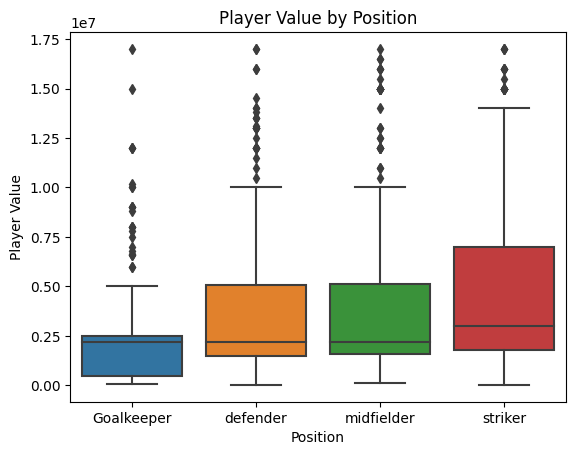

In [35]:
sns.boxplot(x='main_position', y='total_MV', data=position_mv_df)
plt.title('Player Value by Position')
plt.xlabel('Position')
plt.ylabel('Player Value')
plt.show()

In [ ]:
dist = get_common_distributions()
print(dist)
f = Fitter(position_value, distributions= dist)
f.fit()
f.summary()

In [ ]:
position_value = position_mv_df["total_MV"].values
f = Fitter(position_value,
           distributions=['gamma'])
f.fit()
f.summary()

## Part 5

In [151]:
league_data = pd.read_csv("statistics table189.csv",usecols=['Season', 'Goals', 'Competition'])  # assume data is in a CSV file
league_df = league_data[league_data['Season'] == '21/22']
leagues = ['LaLiga','Serie A', 'Premier League', 'Ligue 1', 'Bundesliga']
league_df = league_df[league_df['Competition'].isin(leagues)]
league_df['Goals'].replace('-', np.nan, inplace=True)
league_df.dropna(inplace=True)
#print(league_df['Competition'].unique())
league_df['Goals']= league_df['Goals'].astype(int)
#goals_per_league = league_df.groupby('Competition')['Goals'].sum()
#goals_per_league_df = pd.DataFrame({'Competition': goals_per_league.index, 'goals': goals_per_league.values})
league_df.head()

,Season,Competition,Goals
73,21/22,LaLiga,1
89,21/22,LaLiga,2
118,21/22,LaLiga,3
187,21/22,LaLiga,2
253,21/22,LaLiga,1


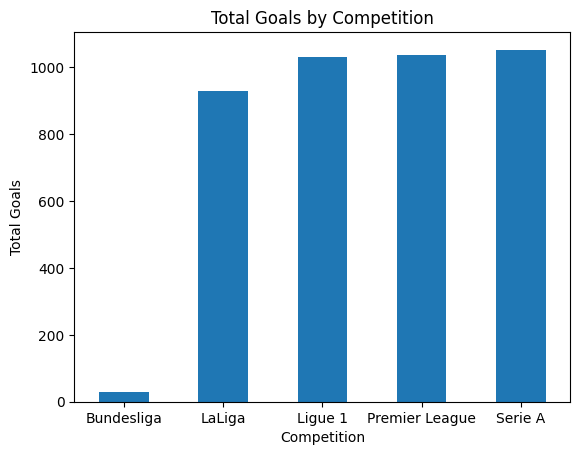

In [156]:
league_df.groupby('Competition')['Goals'].sum().plot(kind='bar')
plt.title('Total Goals by Competition')
plt.xlabel('Competition')
plt.ylabel('Total Goals')
plt.xticks(rotation=0)
plt.show()

## Part 6

In [158]:
club_data = pd.read_csv("transfer table189.csv",usecols=['Season', 'Joined', 'Fee'])  # assume data is in a CSV file
club_df = club_data[club_data['Season'].isin(['21/22', '20/21', '19/20', '18/19', '17/18'])]

club_df['Fee'].replace('-', np.nan, inplace=True)
club_df['Fee'].replace('?', np.nan, inplace=True)
club_df['Fee'].replace('Endofloan', np.nan, inplace=True)
club_df['Fee'].replace('loantransfer', np.nan, inplace=True)

club_df.dropna(inplace=True)
#print(club_df.dtypes)
#print(league_df['Competition'].unique())

def process_value(value):
    # Remove the "€" from the beginning of the value
    # Check if the last letter is "m" or "k" and scale the number accordingly
    if value == '-':
        value = np.nan
    elif 'fee' in value:
        value = value.split(':')[1]
        if 'm' in value:
            value = value[1:]
            value = float(value[:-1]) * 1000000
        elif 'k' in value:
            value = value[1:]
            value = float(value[:-1]) * 1000
    elif 'm' in value:
        value = value[1:]
        value = float(value[:-1]) * 1000000
    elif 'k' in value:
        value = value[1:]
        value = float(value[:-1]) * 1000
    elif 'freetransfer' in value:
        value = np.nan
    else:
        value = value[1:]
        value = float(0)
    return value

# Apply the function to the desired column of the dataframe
club_df['Fee'] = club_df['Fee'].apply(process_value)
club_df = club_df.rename(columns={'Joined': 'Club'})

club_df.dropna(inplace=True)

#club_df.head(30)
club_df.head()
#print(grouped_df)

c:\Users\1001\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)
c:\Users\1001\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)
C:\Users\1001\AppData\Local\Temp\ipykernel_26788\3740107014.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pa

,Season,Club,Fee
0,18/19,RealMadrid,35000000.0
7,18/19,RealMadrid,8500000.0
21,19/20,RealMadrid,50000000.0
22,18/19,FCPorto,7000000.0
45,19/20,RealMadrid,48000000.0


In [159]:
grouped_df = club_df.groupby(['Season', 'Club'])['Fee'].sum()
club_cost_df = grouped_df.reset_index()

In [160]:
club_cost_df.tail()

,Season,Club,Fee
811,21/22,VillarrealCFB,20000.0
812,21/22,Watford,35500000.0
813,21/22,WestHam,74500000.0
814,21/22,WestHamU21,1400000.0
815,21/22,Wolves,33800000.0


In [161]:
# use the IQR method to remove outliers
Q1 = club_cost_df['Fee'].quantile(0.25)
Q3 = club_cost_df['Fee'].quantile(0.75)
IQR = Q3 - Q1
club_cost_df = club_cost_df[(club_cost_df['Fee'] >= Q1 - 1.5*IQR) & (club_cost_df['Fee'] <= Q3 + 1.5*IQR)]

In [162]:
grouped_data = club_cost_df.groupby('Season')['Fee'].agg(['mean', 'median', 'std'])
grouped_data


,mean,median,std
Season,,,
17/18,1.057945e+07,3000000.0,1.485986e+07
18/19,1.056156e+07,3000000.0,1.598395e+07
19/20,1.150952e+07,4000000.0,1.607094e+07
20/21,1.210496e+07,3640000.0,1.607439e+07
21/22,1.402744e+07,6050000.0,1.776762e+07


['cauchy', 'chi2', 'expon', 'exponpow', 'gamma', 'lognorm', 'norm', 'powerlaw', 'rayleigh', 'uniform']


Fitting 10 distributions: 100%|██████████| 10/10 [00:00<00:00, 12.81it/s]


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
lognorm,5.963281e-15,3861.719463,-28460.919262,inf,0.066721,3.021844e-03
exponpow,1.911300e-14,3825.088284,-27617.641790,inf,0.068304,2.213811e-03
gamma,2.212230e-14,3903.756885,-27511.780414,inf,0.102178,4.927187e-07
powerlaw,3.894273e-14,3699.117099,-27102.354078,inf,0.139032,1.136827e-12
cauchy,7.978696e-14,4045.872866,-26589.636766,inf,0.307852,2.025331e-61


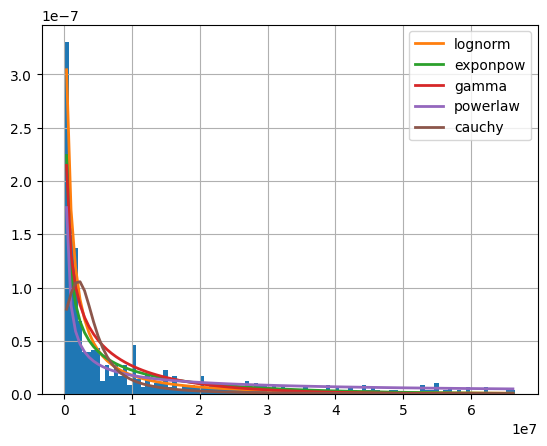

In [163]:
cost = club_cost_df["Fee"].values
dist = get_common_distributions()
print(dist)
f = Fitter(cost, distributions= dist)
f.fit()
f.summary()

Fitting 2 distributions: 100%|██████████| 2/2 [00:00<00:00,  6.10it/s]


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
gamma,2.212230e-14,3903.756885,-27511.780414,inf,0.102178,4.927187e-07
pearson3,3.029955e-14,3805.856644,-27284.048524,inf,0.124163,3.464976e-10


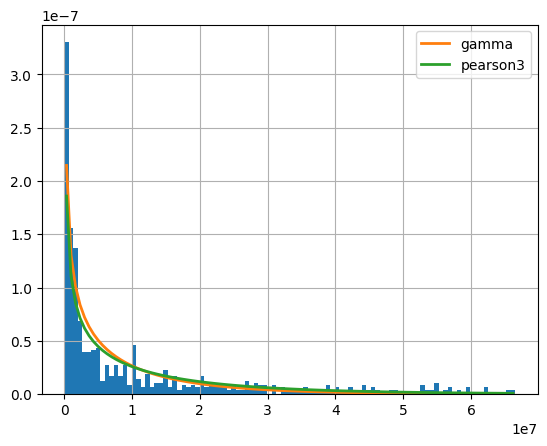

In [166]:
cost = club_cost_df["Fee"].values
f = Fitter(cost,
           distributions=['gamma',
                          "pearson3",
                          
                          ])
f.fit()
f.summary()

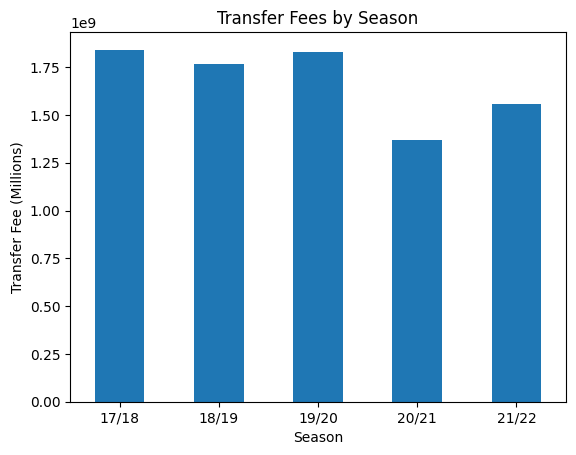

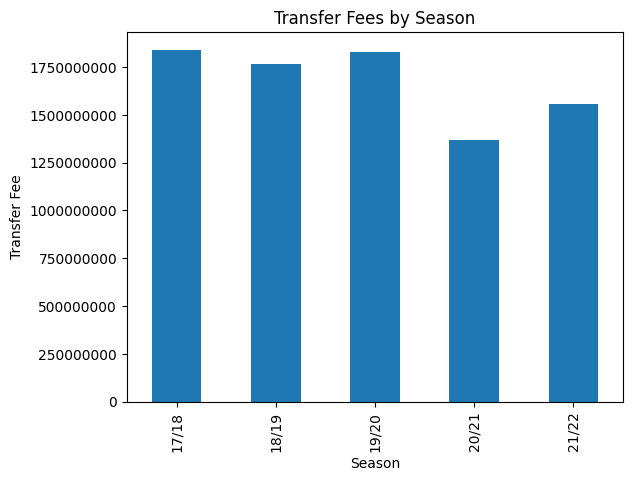

In [174]:
club_cost_df.groupby('Season')['Fee'].sum().plot(kind='bar')
plt.title('Transfer Fees by Season')
plt.xlabel('Season')
plt.ylabel('Transfer Fee (Millions)')
plt.xticks(rotation=0)
plt.show()